In [12]:
import os, ssl
if (not os.environ.get('PYTHONHTTPSVERIFY', '') and getattr(ssl, '_create_unverified_context', None)): 
  ssl._create_default_https_context = ssl._create_unverified_context

In [42]:
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf

In [14]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [15]:
def batch_selector(x,y,batch_size,mode="random"):
    if(mode=="random"):
        indices=np.random.choice(len(x),batch_size)
        return(x[indices],y[indices],indices)
    

In [85]:
def plotit(y,labelx,labely,title):
    plt.plot(y)
    plt.xlabel(labelx)
    plt.ylabel(labely)
    plt.suptitle(title)
    plt.show()

In [86]:
class NN:
    def __init__ (self,I,H,O):
        self.I=I
        self.H=H
        self.O=O
        self.W1 = tf.Variable(tf.random_normal([H[-1], O]))
        self.b1 = tf.Variable(tf.ones([O]))
        self.x_ = tf.placeholder(tf.float32, [None, I])
        self.x=[self.x_]
        self.W = [tf.Variable(tf.random_normal([I, H[0]]))]+[tf.Variable(tf.random_normal([H[HH], H[HH+1]])) for HH in range(len(H)-1)]
        self.b = [tf.Variable(tf.ones([HH])) for HH in H]
        for ii in range(len(H)):
            self.x=self.x+[tf.nn.sigmoid(tf.matmul(self.x[-1], self.W[ii]) + self.b[ii])]

        self.y = tf.nn.softmax(tf.matmul(self.x[-1], self.W1) + self.b1)
        self.y_ = tf.placeholder(tf.float32, [None, O])
        self.cross_entropy1 = (-tf.reduce_sum(self.y_ * tf.log(self.y), reduction_indices=[1]))
        self.cross_entropy=tf.reduce_mean(self.cross_entropy1)
        self.train_step = tf.train.GradientDescentOptimizer(1.0).minimize(self.cross_entropy)
        self.correct_prediction = tf.equal(tf.argmax(self.y,1), tf.argmax(self.y_,1))
        self.accuracy = tf.reduce_mean(tf.cast(self.correct_prediction, tf.float32))
    def addh(self,hh):
        HH=0

In [87]:
ff=NN(784,[32,32,32],10)

In [88]:
sess = tf.InteractiveSession()
tf.global_variables_initializer().run()
batch_size=100;accumulator1=[]

In [92]:
for _ in range(1000):
    batch_xs, batch_ys,indices = batch_selector(mnist.train.images,mnist.train.labels,batch_size,'random')
    sess.run(ff.train_step, feed_dict={ff.x_: batch_xs, ff.y_: batch_ys})
    if _%10==0:
        accumulator1=accumulator1+[sess.run(ff.cross_entropy, feed_dict={ff.x_: mnist.train.images, ff.y_: mnist.train.labels})]

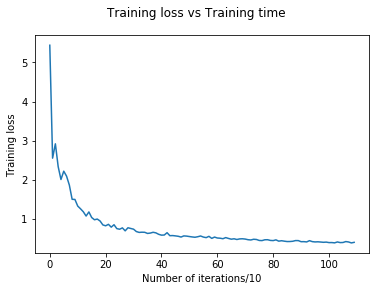

In [93]:
plotit(accumulator1,"Number of iterations/10","Training loss","Training loss vs Training time")

In [94]:
sess.run(ff.accuracy, feed_dict={ff.x_: mnist.test.images, ff.y_: mnist.test.labels})

0.8865